In [1]:
import pandas as pd
data = pd.read_csv('/content/all_data.csv')
print(data.shape)
print(data.columns)

(4236, 52)
Index(['problem', 'level', 'type', 'modified_problem', 'no_of_equations',
       'no_of_variables', 'has_exp_or_mod', 'has_logarithm', 'has_fraction',
       'has_eq_or_neq', 'sentence_count', 'word_count', 'words_per_sentence',
       'average_word_length', 'large_words', 'has_repeated_large_words',
       'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC',
       'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT',
       'QUANTITY', 'TIME', 'WORK_OF_ART', 'ADJ', 'ADP', 'ADV', 'AUX', 'CONJ',
       'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT',
       'SCONJ', 'SYM', 'VERB', 'X'],
      dtype='object')


In [2]:
data.head()

,problem,level,type,modified_problem,no_of_equations,no_of_variables,has_exp_or_mod,has_logarithm,has_fraction,has_eq_or_neq,...,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X
0,"The graphs of four functions, labelled (2) thr...",Level 5,Algebra,"The graphs of four functions, labelled (2) thr...",1,0,False,False,False,False,...,16,8,0,1,19,117,1,3,8,13
1,If each of the variables represents a differen...,Level 3,Algebra,If each of the variables represents a differen...,1,4,False,False,True,False,...,7,2,0,3,7,29,1,0,2,6
2,What is the value of $a$ if the lines $2y - 2a...,Level 4,Algebra,What is the value of if the lines and are p...,2,3,False,False,True,True,...,2,0,0,1,0,1,1,0,0,0
3,Define $\#N$ by the formula $\#N = .5(N) + 1$....,Level 3,Algebra,Define by the formula . Calculate .,3,1,False,False,False,True,...,1,0,0,0,0,2,0,0,2,0
4,What is the midpoint of the segment with endpo...,Level 2,Algebra,What is the midpoint of the segment with endpo...,0,0,False,False,False,False,...,3,1,0,1,1,5,0,0,0,0


In [ ]:
data.drop(columns = ['problem', 'modified_problem'], inplace = True)

In [3]:
X = data.drop(columns = ['level'])
y = data['level']

##Spectral-clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

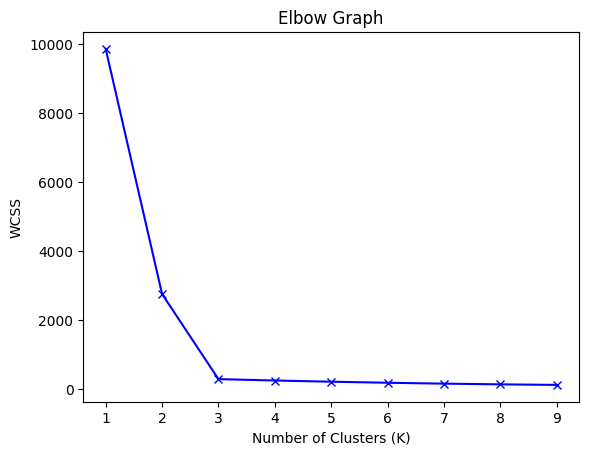

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=150, centers=3, random_state=42)

# Perform K-means clustering for different values of K
k_values = range(1, 10)  # Number of clusters
wcss = []  # Within-cluster sum of squares

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

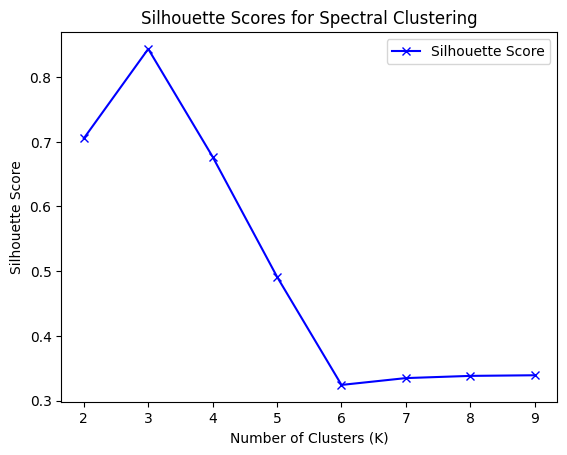

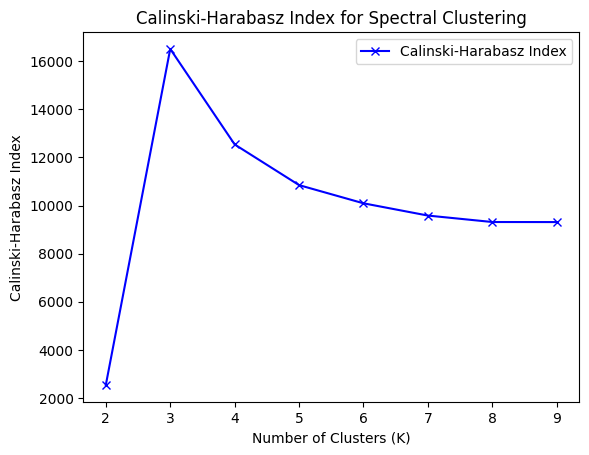

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Generate sample data
X, _ = make_blobs(n_samples=1000, centers=3, random_state=42)

# Perform spectral clustering for different values of K
k_values = range(2, 10)  # Number of clusters
silhouette_scores = []  # Silhouette scores
calinski_scores = []  # Calinski-Harabasz index scores

for k in k_values:
    spectral_clustering = SpectralClustering(n_clusters=k)
    labels = spectral_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bx-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Spectral Clustering')
plt.legend()
plt.show()

# Plot the Calinski-Harabasz index scores
plt.plot(k_values, calinski_scores, 'bx-', label='Calinski-Harabasz Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Spectral Clustering')
plt.legend()
plt.show()


In [21]:
from sklearn.cluster import SpectralClustering

# Create a SpectralClustering object
spectral_clustering = SpectralClustering(
    n_clusters=3,          # Number of clusters to identify
    affinity='nearest_neighbors',   # Affinity matrix computation method (can be 'nearest_neighbors', 'rbf', etc.)
    n_neighbors=10,        # Number of neighbors for the nearest_neighbors affinity option
    assign_labels='kmeans' # Method for assigning labels ('kmeans' or 'discretize')
)

# Fit and predict the clusters
clusters = spectral_clustering.fit_predict(X)

# Access the cluster assignments
print(clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


[0 0 2 1 1 0 2 2 2 2 1 0 1 2 2 2 1 1 1 1 2 0 0 0 2 1 1 1 2 2 0 0 2 1 1 0 0
 2 0 0 1 2 1 0 1 0 1 1 0 2 0 1 2 0 1 0 1 1 1 2 2 1 0 0 1 1 0 2 2 1 0 1 2 2
 2 0 2 1 1 1 2 1 1 1 2 0 2 0 1 1 1 1 2 2 0 2 0 1 2 2 2 0 0 1 0 2 2 1 2 1 0
 2 2 2 1 2 0 0 2 1 1 2 0 2 0 0 2 0 2 2 1 2 2 0 1 0 1 2 2 2 1 1 0 0 0 1 2 1
 1 1 1 0 2 0 1 2 1 2 1 0 2 1 1 2 1 1 2 2 0 0 2 1 1 2 1 0 2 0 2 0 1 2 1 2 1
 0 1 0 1 0 2 1 2 2 1 0 2 2 2 0 1 2 1 1 2 1 2 1 1 2 2 0 0 2 2 1 0 1 0 2 0 0
 2 1 0 1 1 2 0 1 1 0 1 0 2 2 0 2 0 2 0 0 0 2 0 1 2 1 2 1 2 2 0 2 1 2 1 2 2
 2 2 1 0 2 0 0 2 1 1 0 2 1 2 2 1 0 1 0 0 2 0 2 0 2 2 1 1 2 1 0 0 1 2 2 0 1
 2 0 0 1 0 0 2 0 1 2 0 2 0 0 0 0 0 2 0 0 2 1 0 0 2 0 0 2 0 2 1 2 1 1 2 2 0
 0 0 1 0 2 0 2 0 2 2 2 1 1 0 0 1 1 1 1 1 2 1 1 2 1 1 0 2 2 2 2 0 2 0 0 0 2
 2 1 1 2 1 2 1 0 2 1 0 2 0 2 2 0 1 0 2 0 2 1 0 1 0 0 0 1 2 1 1 0 1 2 1 0 2
 1 1 0 2 1 0 0 0 2 0 1 0 2 1 1 1 1 1 0 2 0 2 2 1 1 0 1 0 2 0 2 0 1 0 0 0 2
 1 1 2 1 0 0 0 0 1 1 0 1 2 0 2 1 2 2 1 1 2 2 2 0 2 1 0 1 1 0 0 2 0 1 2 1 0
 2 0 2 2 1 2 0 1 1 1 2 1 

In [22]:
type(y)

pandas.core.series.Series

In [23]:
y1 = pd.Series(clusters)

In [12]:
pd.crosstab(y, y1)

col_0,0,1,2,3
level,,,,
Level 1,19,17,31,29
Level 2,60,57,35,42
Level 3,57,57,57,58
Level 4,49,60,64,58
Level 5,65,58,63,64


In [24]:
pd.crosstab(y, y1)

col_0,0,1,2
level,,,
Level 1,38,26,32
Level 2,55,68,71
Level 3,77,76,76
Level 4,75,81,75
Level 5,88,83,79
